In [2]:
# kto_total 엑셀 파일 읽어들인 후 조회하기
# df 변수 이름으로 가지고 오기
import pandas as pd

In [38]:
df = pd.read_excel('./kto_total.xlsx',index_col = 0)

In [39]:
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [31]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

if platform.system() == "Windows" :
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
elif platform.system() == "Darwin":
    rc("font", family="AppleGothic")
else :
    print('check your OS System...')

In [42]:
# 중국 데이터만 조회하기
df_filter=df[df['국적']=='중국']

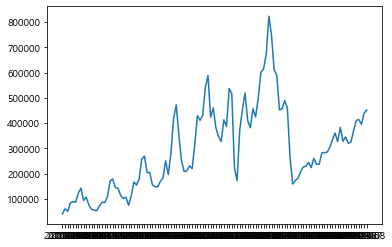

In [44]:
# 기준년월별 관광객 변화 추이
plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.show()

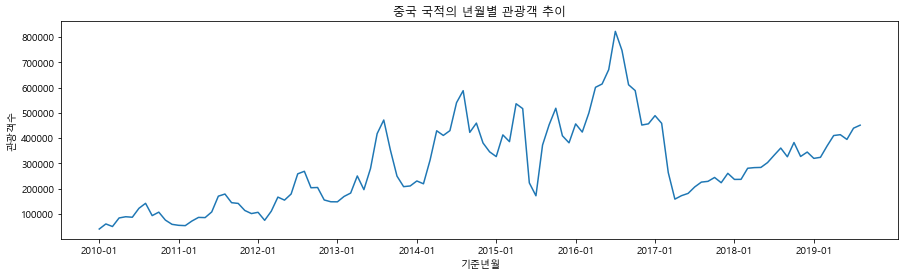

In [52]:
# 그래프 크기 조정
plt.figure(figsize=(15,4))
# 데이터 넣기
plt.plot(df_filter['기준년월'], df_filter['관광'])
# 그래프 전체 제목 넣기
plt.title('중국 국적의 년월별 관광객 추이')
# x축, y축 이름 달기
plt.xlabel("기준년월")
plt.ylabel("관광객수")

# x축의 눈금 값 설정하기
plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01",
            "2015-01","2016-01","2017-01","2018-01","2019-01"])
plt.show()

In [77]:
# 우리나라에 방문하는 외국인 관광객의 비율이 가장 높은 상위 5개 국가를 조회
# 상위 top5 국가 조회...
# 나의풀이
temp = df.groupby('국적').mean().reset_index().sort_values(by='전체비율(%)', ascending = False)[0:5][['국적','전체비율(%)']]

In [79]:
# 강사님풀이
temp=df.pivot_table(values='전체비율(%)', index='국적',aggfunc='mean').sort_values(by='전체비율(%)', ascending=False).head()

In [81]:
# 데이터 프레임 형태로 변환하기 -> 피봇에 리셋인덱스임
temp.reset_index(inplace=True)

In [82]:
cntry_list = temp['국적']
cntry_list

0    중국
1    일본
2    대만
3    미국
4    홍콩
Name: 국적, dtype: object

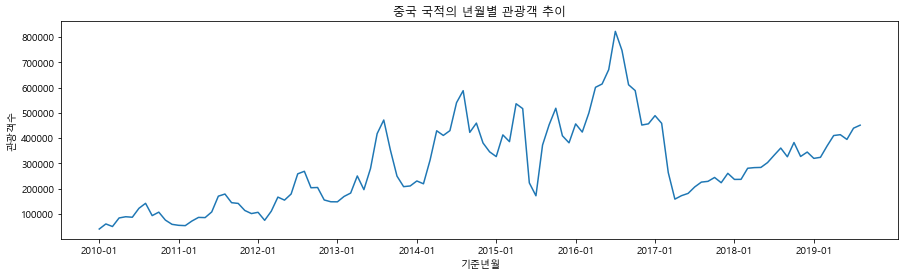

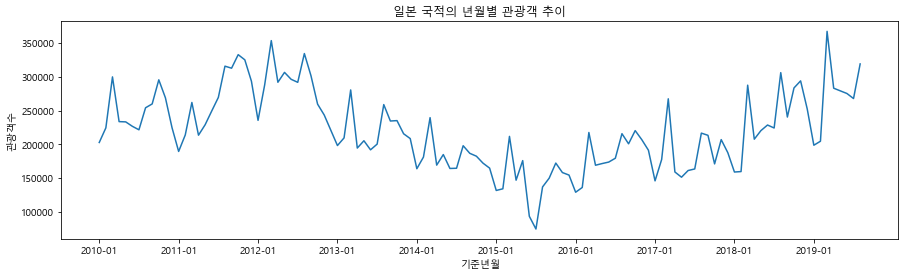

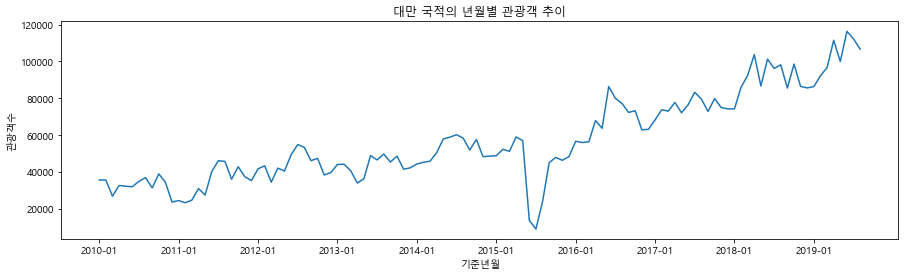

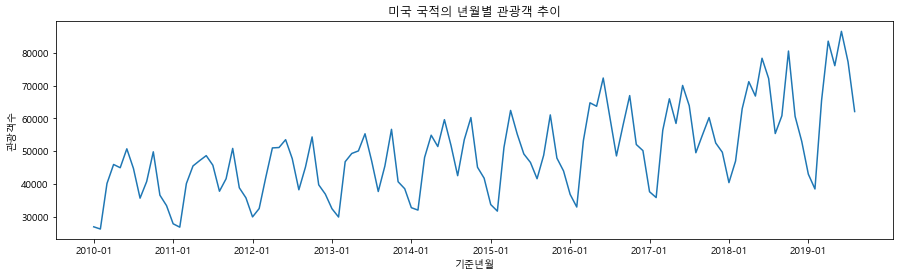

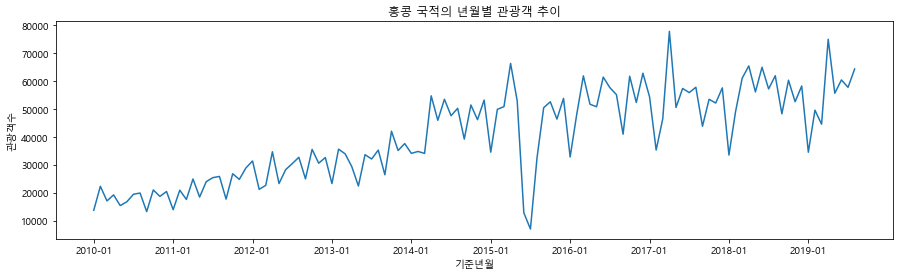

In [88]:
# cntry_list 상위5개 국적을 이용해서
# 기준년월별 관광객의 추이 그래프 그리기
# 반복문 사용해서 그리기
# 그래프 제목은 각 국가 이름으로

for k in cntry_list:
    df_filter=df[df['국적']==k]
    
    # 그래프 크기 조정
    plt.figure(figsize=(15,4))
    # 데이터 넣기
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    # 그래프 전체 제목 넣기
    plt.title(f'{k} 국적의 년월별 관광객 추이')
    # x축, y축 이름 달기
    plt.xlabel("기준년월")
    plt.ylabel("관광객수")

    # x축의 눈금 값 설정하기
    plt.xticks(["2010-01","2011-01","2012-01","2013-01","2014-01",
                "2015-01","2016-01","2017-01","2018-01","2019-01"])
    plt.show()


In [89]:
# 히트맵 그리기
# 약한 DataFrame복제
df2 = df
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [90]:
df2 = df.copy()
df2

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0


In [97]:
# df2의 기준년월 데이터에서 년도만 추출하여 "년도" 컬럼 만들기
# df2의 기준년월 데이터에서 월만 추출하여 '월' 컬럼 만들기
df2['년도']=df2['기준년월'].str[0:4]
df2['월']=df2['기준년월'].str[5:7]
df2
#.str.slice(0:4) 이런것도 있다~

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,대양주 기타,519,1,6,9,74,609,2019-08,오세아니아,85.2,0.0,2019,08
6956,남아프리카공화국,634,6,1,11,1235,1887,2019-08,아프리카,33.6,0.1,2019,08
6957,아프리카 기타,2081,593,165,841,1184,4864,2019-08,아프리카,42.8,0.2,2019,08
6958,국적미상,36,1,0,8,12,57,2019-08,기타대륙,63.2,0.0,2019,08


In [101]:
condition = df2['국적'] == '중국'
df_filter = df2[condition]
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6677,중국,410542,3575,362,9959,68812,493250,2019-04,아시아,83.2,29.7,2019,04
6737,중국,413949,4034,534,14003,67893,500413,2019-05,아시아,82.7,33.6,2019,05
6797,중국,395196,3743,399,14680,60989,475007,2019-06,아시아,83.2,31.9,2019,06
6857,중국,439699,3587,356,10847,64643,519132,2019-07,아시아,84.7,36.1,2019,07


In [110]:
# 년도 및 월별 관광 데이터 조회
# 히트맵을 그릴때는 피봇테이블 형태로 일반적으로 세팅함
df_pivot=df_filter.pivot_table(values = '관광', index='년도', columns='월')

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

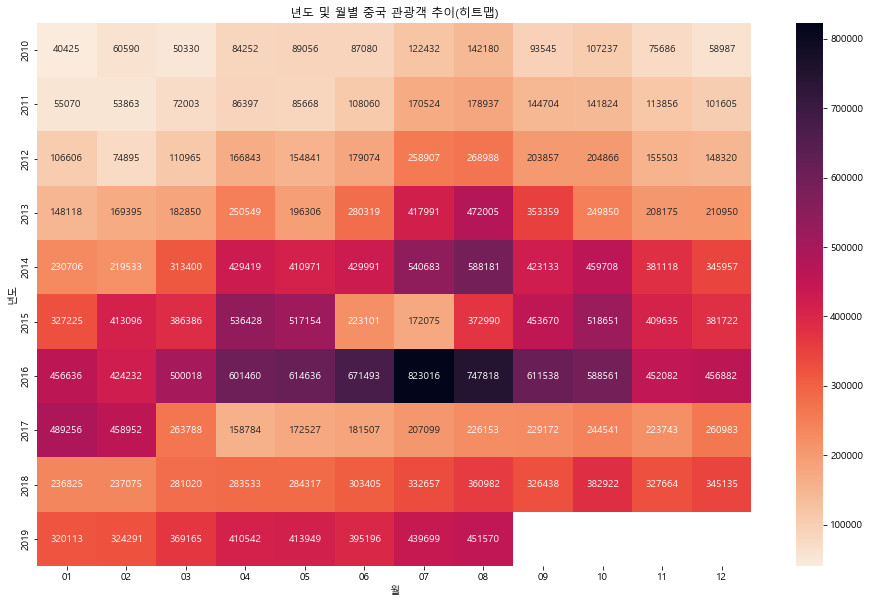

In [117]:
# 그래프 사이즈 설정하기
plt.figure(figsize = (16,10))

# 히트맵그리기
sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap = "rocket_r")

plt.title("년도 및 월별 중국 관광객 추이(히트맵)")
plt.show()

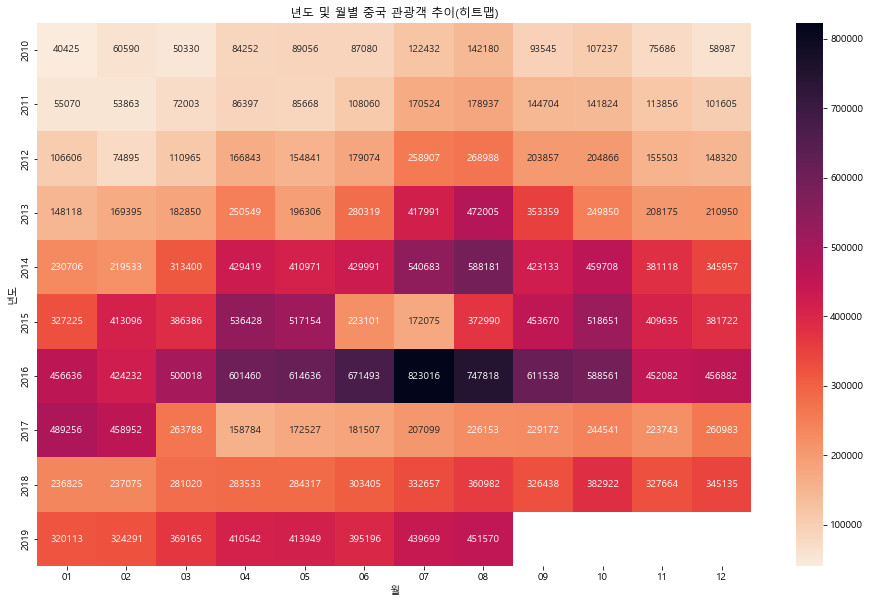

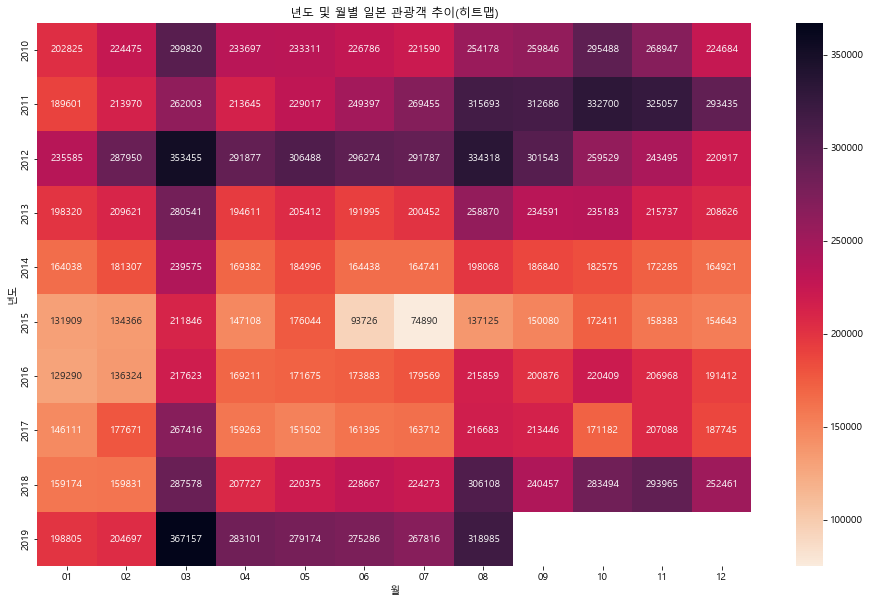

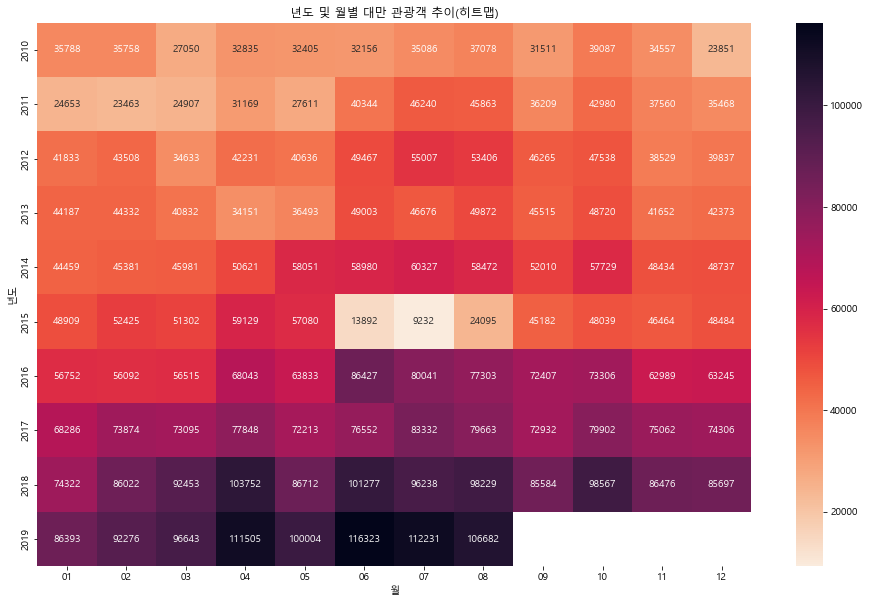

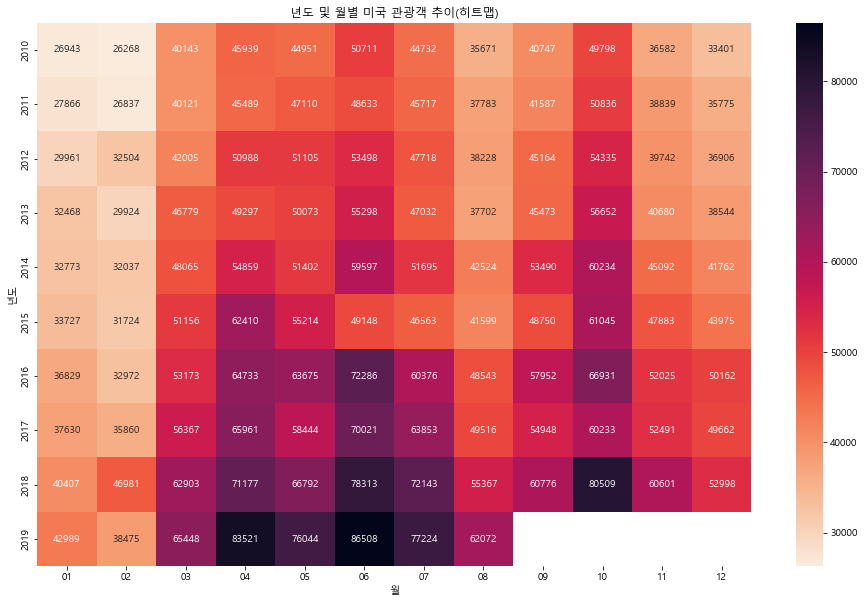

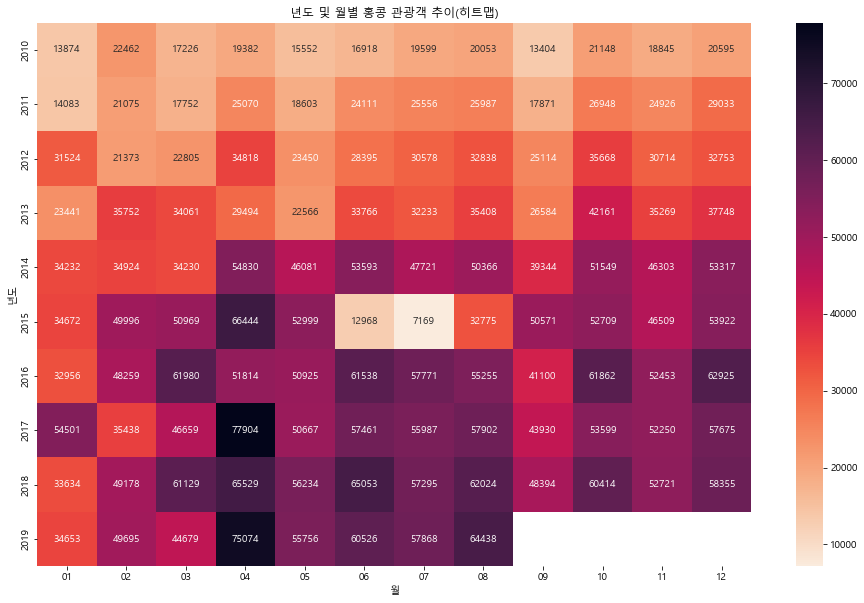

In [119]:
for z in cntry_list:
    condition = df2['국적'] == z
    df_filter = df2[condition]
    df_pivot=df_filter.pivot_table(values = '관광', index='년도', columns='월')
    
    # 그래프 사이즈 설정하기
    plt.figure(figsize = (16,10))

    # 히트맵그리기
    sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap = "rocket_r")

    plt.title("년도 및 월별 {} 관광객 추이(히트맵)".format(z))
    plt.show()


In [ ]:
# (트랜드) 2010년부터 2018년까지 관광객수가 꾸준히 증가하고 있으며,
#              계절적인 영향을 많이 받는것으로 보임
# (이벤트) 2015년 6월 ~ 8월 중에 관광객수가 급격히 감소 했음
#          ~ 원인분석 : 메르스 전염병에 의한 일시적 감소를 보였으며, 이후 증가됨
#         중국의 경우 2017년 3월부터 관광객수가 급격히 감소 했음
#          ~ 원인분석 : 우리나라 정부의 사드 미사일 기지 설치에 따른 보복으로
#                       급격히 감소하였으며, 매우 미미하게 관광객이 증가하고 있음
# (계절) 2010년부터 4월~8월 사이에 국내 관광개이 많으며,
#        2016년 이후 봄, 여름에 매우 많은 관광객과, 가을에 매우 많은 광광객이 찾고있음